In [2]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
pasta_treino = 'C:/kaggle/vc-master-24-2-dogs-vs-cats/train'

In [4]:
pasta_submission = 'C:/kaggle/vc-master-24-2-dogs-vs-cats/samples'

In [5]:
try:
    arquivos = os.listdir(pasta_treino)
    arquivos_filtrados = [arquivo for arquivo in arquivos if os.path.isfile(os.path.join(pasta_treino, arquivo))] # Filtra apenas arquivos, excluindo subpastas
    primeiros_5_arquivos = arquivos_filtrados[:5] # Pega os 5 primeiros

    if primeiros_5_arquivos:
        print(f"Os primeiros 5 arquivos da pasta '{pasta_treino}' são:")
        for arquivo in primeiros_5_arquivos:
            print(f"- {arquivo}")
    else:
        print(f"Não foram encontrados arquivos na pasta '{pasta_treino}'.")

except FileNotFoundError:
    print(f"A pasta '{pasta_treino}' não foi encontrada.")
except Exception as e:
    print(f"Ocorreu um erro: {e}")

Os primeiros 5 arquivos da pasta 'C:/kaggle/vc-master-24-2-dogs-vs-cats/train' são:
- cat.0.jpg
- cat.1.jpg
- cat.10.jpg
- cat.100.jpg
- cat.1000.jpg


In [6]:
try:
    arquivos = os.listdir(pasta_submission)
    arquivos_filtrados = [arquivo for arquivo in arquivos if os.path.isfile(os.path.join(pasta_submission, arquivo))] # Filtra apenas arquivos, excluindo subpastas
    primeiros_5_arquivos = arquivos_filtrados[:5] # Pega os 5 primeiros

    if primeiros_5_arquivos:
        print(f"Os primeiros 5 arquivos da pasta '{pasta_submission}' são:")
        for arquivo in primeiros_5_arquivos:
            print(f"- {arquivo}")
    else:
        print(f"Não foram encontrados arquivos na pasta '{pasta_submission}'.")

except FileNotFoundError:
    print(f"A pasta '{pasta_submission}' não foi encontrada.")
except Exception as e:
    print(f"Ocorreu um erro: {e}")

Os primeiros 5 arquivos da pasta 'C:/kaggle/vc-master-24-2-dogs-vs-cats/samples' são:
- 1.jpg
- 10.jpg
- 100.jpg
- 101.jpg
- 102.jpg


In [7]:
# Função para carregar imagens de um diretório e redimensionar
def load_images_from_folder(folder, img_size, labels_dict=None, max_images=None, sort=False):
    images = []
    labels = []

    file_list = os.listdir(folder)
    # Ordenar os arquivos numericamente (por conta do submission file)
    if sort:
        file_list = sorted(file_list, key=lambda x: int(x.split('.')[0]))

    for filename in file_list:
        if max_images and len(images) >= max_images:
            break
        if filename.endswith(".jpg"):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).resize((img_size, img_size)).convert('RGB')
            img_array = np.array(img)
            images.append(img_array)
            # Etiquetar as imagens: 0 para gato, 1 para cachorro
            if labels_dict:
                labels.append(labels_dict[filename])
            elif 'cat' in filename:
                labels.append('cat')
            elif 'dog' in filename:
                labels.append('dog')
    return np.array(images), np.array(labels)

In [8]:
img_size = 64  # Redimensionar imagens para 64x64 pixels

# Carregar imagens de treino
X_train, y_train = load_images_from_folder(pasta_treino, img_size)

# Para o conjunto de teste, podemos simplesmente carregar as imagens sem etiquetas
# ou usar um conjunto de validação a partir dos dados de treinamento
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_submission, _ = load_images_from_folder(pasta_submission, img_size, sort=True)

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Função para detectar imagens corrompidas
def detect_corrupted_images(folder):
    corrupted_files = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg"):
            try:
                img = Image.open(os.path.join(folder, filename))
                img.verify()  # Verificar a integridade do arquivo
            except (IOError, SyntaxError) as e:
                corrupted_files.append(filename)
    return corrupted_files

# Detectar imagens corrompidas
corrupted_train_images = detect_corrupted_images(pasta_treino)
print(f"Imagens corrompidas no conjunto de treino: {corrupted_train_images}")

corrupted_submission_images = detect_corrupted_images(pasta_submission)
print(f"Imagens corrompidas no conjunto de submissão: {corrupted_submission_images}")

Imagens corrompidas no conjunto de treino: []
Imagens corrompidas no conjunto de submissão: []


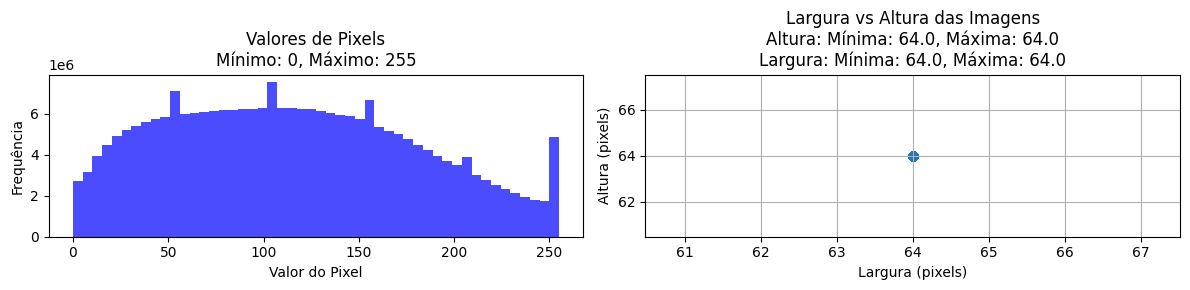

In [10]:
# Obter valores mínimos e máximos dos pixels
pixel_min = np.min(X_train)
pixel_max = np.max(X_train)

# Obter dimensões das imagens
image_heights = X_train.shape[1] * np.ones(X_train.shape[0])
image_widths = X_train.shape[2] * np.ones(X_train.shape[0])

# Plotar valores mínimos e máximos dos pixels
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(X_train.flatten(), bins=50, color='blue', alpha=0.7)
plt.title(f'Valores de Pixels\nMínimo: {pixel_min}, Máximo: {pixel_max}')
plt.xlabel('Valor do Pixel')
plt.ylabel('Frequência')

# Plotar gráfico de dispersão de largura vs altura
plt.subplot(1, 2, 2)
plt.scatter(image_widths, image_heights, alpha=0.5)
plt.title(f'Largura vs Altura das Imagens\nAltura: Mínima: {image_heights.min()}, Máxima: {image_heights.max()}\nLargura: Mínima: {image_widths.min()}, Máxima: {image_widths.max()}')
plt.xlabel('Largura (pixels)')
plt.ylabel('Altura (pixels)')
plt.grid(True)

plt.tight_layout()
plt.show()

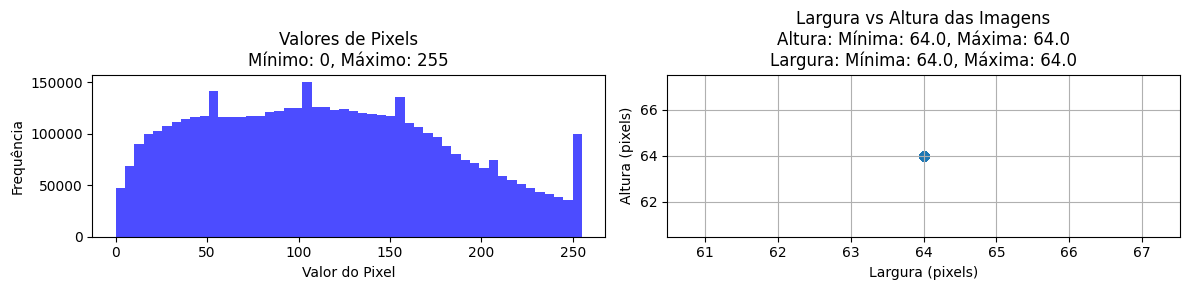

In [11]:
# Base de Submissão
# Obter valores mínimos e máximos dos pixels
pixel_min = np.min(X_submission)
pixel_max = np.max(X_submission)

# Obter dimensões das imagens
image_heights = X_submission.shape[1] * np.ones(X_submission.shape[0])
image_widths = X_submission.shape[2] * np.ones(X_submission.shape[0])

# Plotar valores mínimos e máximos dos pixels
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(X_submission.flatten(), bins=50, color='blue', alpha=0.7)
plt.title(f'Valores de Pixels\nMínimo: {pixel_min}, Máximo: {pixel_max}')
plt.xlabel('Valor do Pixel')
plt.ylabel('Frequência')

# Plotar gráfico de dispersão de largura vs altura
plt.subplot(1, 2, 2)
plt.scatter(image_widths, image_heights, alpha=0.5)
plt.title(f'Largura vs Altura das Imagens\nAltura: Mínima: {image_heights.min()}, Máxima: {image_heights.max()}\nLargura: Mínima: {image_widths.min()}, Máxima: {image_widths.max()}')
plt.xlabel('Largura (pixels)')
plt.ylabel('Altura (pixels)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [12]:
# Normalizar os dados
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_submission = X_submission.astype('float32') / 255.0

In [13]:
# Verificar formas dos dados carregados
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_submission shape: {X_submission.shape}')

X_train shape: (20000, 64, 64, 3)
y_train shape: (20000,)
X_test shape: (5000, 64, 64, 3)
y_test shape: (5000,)
X_submission shape: (400, 64, 64, 3)


In [14]:
train_unique_values, train_counts = np.unique(y_train, return_counts=True)
print("Valores únicos:", train_unique_values)
print("Contagens:", train_counts)

Valores únicos: ['cat' 'dog']
Contagens: [ 9985 10015]


# Aplicar HOG

In [15]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [17]:
def extrair_caracteristicas_hog(imagens):
    """Extrai características HOG de uma lista de imagens."""
    caracteristicas_hog_lista = []
    for imagem in imagens:
        # Certifique-se de que a imagem está em escala de cinza (HOG geralmente funciona melhor assim)
        if len(imagem.shape) > 2 and imagem.shape[2] > 1: # Se for colorida, converte para cinza
            from skimage.color import rgb2gray
            imagem_cinza = rgb2gray(imagem)
        else:
            imagem_cinza = imagem # Já está em cinza ou é uma imagem 2D

        # Calcula as características HOG
        caracteristicas = hog(imagem_cinza, orientations=8, pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2), visualize=False, channel_axis=None) # channel_axis=None para imagem em escala de cinza
        caracteristicas_hog_lista.append(caracteristicas)
    return np.array(caracteristicas_hog_lista) # Converte para numpy array

# Extrai características HOG das imagens de treino, teste e submission
X_train_hog = extrair_caracteristicas_hog(X_train)
X_test_hog = extrair_caracteristicas_hog(X_test)
X_submission_hog = extrair_caracteristicas_hog(X_submission)

print("Shape dos dados HOG antes do PCA:")
print("X_train_hog shape:", X_train_hog.shape)
print("X_test_hog shape:", X_test_hog.shape)
print("X_submission_hog shape:", X_submission_hog.shape)

Shape dos dados HOG antes do PCA:
X_train_hog shape: (20000, 1568)
X_test_hog shape: (5000, 1568)
X_submission_hog shape: (400, 1568)


In [36]:
def aplicar_pca(X_train_hog, X_test_hog, X_submission_hog, n_componentes=50):
    """Aplica PCA aos dados HOG."""
    pca = PCA(n_components=n_componentes)
    X_train_pca = pca.fit_transform(X_train_hog) # Fit no treino e transforma o treino
    X_test_pca = pca.transform(X_test_hog)       # Aplica a transformação aprendida no teste
    X_submission_pca = pca.transform(X_submission_hog) # Aplica a transformação aprendida no submission
    return X_train_pca, X_test_pca, X_submission_pca


# Aplica PCA aos dados HOG
X_train_pca, X_test_pca, X_submission_pca = aplicar_pca(X_train_hog, X_test_hog, X_submission_hog, n_componentes=1500)

print("\nShape dos dados após PCA:")
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)
print("X_submission_pca shape:", X_submission_pca.shape)


Shape dos dados após PCA:
X_train_pca shape: (20000, 1500)
X_test_pca shape: (5000, 1500)
X_submission_pca shape: (400, 1500)


In [37]:
def train_svm(X_train_pca, y_train):
    model_svm = SVC()
    model_svm.fit(X_train_pca, y_train)
    return model_svm

def predict_and_evaluate(model, X, y, dataset_name=""):
    """Faz previsões e avalia o modelo."""
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y)
    print(f'Acurácia {dataset_name}: {accuracy:.4f}')
    print(f'Relatório de Classificação {dataset_name}:\n{classification_report(y, y_pred)}')

# Treina o SVM com os dados PCA transformados
model_svm = train_svm(X_train_pca, y_train)
print('\nResultados de Treino SVM')
predict_and_evaluate(model_svm, X_train_pca, y_train, "Treino")
print('\nResultados de Teste SVM')
predict_and_evaluate(model_svm, X_test_pca, y_test, "Teste")



Resultados de Treino SVM
Acurácia Treino: 1.0000
Relatório de Classificação Treino:
              precision    recall  f1-score   support

         cat       0.94      0.93      0.94      9985
         dog       0.93      0.95      0.94     10015

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000


Resultados de Teste SVM
Acurácia Teste: 1.0000
Relatório de Classificação Teste:
              precision    recall  f1-score   support

         cat       0.77      0.75      0.76      2515
         dog       0.76      0.77      0.76      2485

    accuracy                           0.76      5000
   macro avg       0.76      0.76      0.76      5000
weighted avg       0.76      0.76      0.76      5000



Resultados de Treino
Acurácia: 0.93795
F1 score: 0.9379455514099926


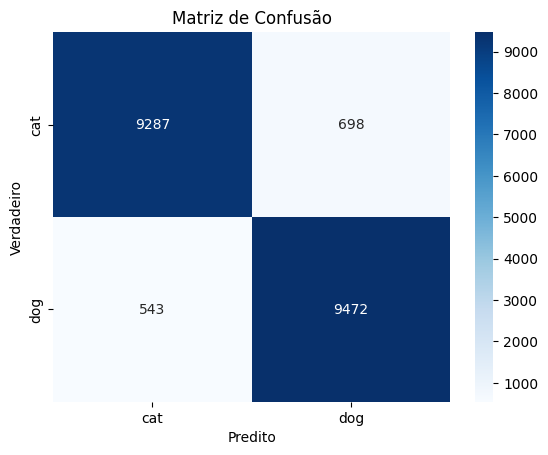

Resultados de Teste
Acurácia: 0.7638
F1 score: 0.7637884826442927


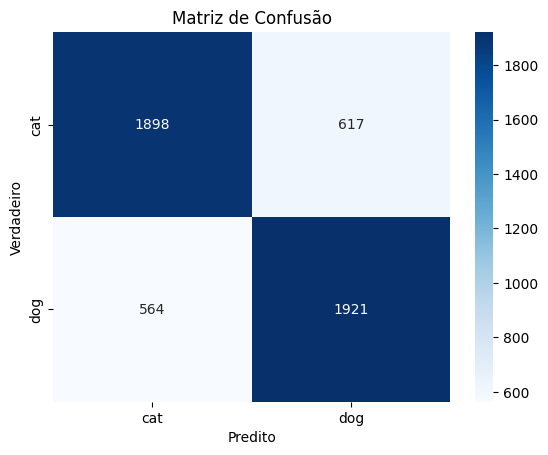

In [38]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, confusion_matrix
import seaborn as sns


# Inferência e avaliação
def predict_and_evaluate_svm(model, X_test_pca, y_test):

    # Inferência
    y_pred_svm = model_svm.predict(X_test_pca)

    # Métricas
    print('Acurácia:', accuracy_score(y_test, y_pred_svm))
    print('F1 score:', f1_score(y_test, y_pred_svm, average='weighted'))

    # Matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred_svm)

    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title('Matriz de Confusão')
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.show()

print('Resultados de Treino')
predict_and_evaluate_svm(model_svm, X_train_pca, y_train)
print('Resultados de Teste')
predict_and_evaluate_svm(model_svm, X_test_pca, y_test)

# Aplicando Optuna para buscar melhores parâmetros

In [39]:
import optuna
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Vamos dividir o conjunto de treino em treino e validação para o Optuna
X_train_pca_optuna, X_val_pca_optuna, y_train_optuna, y_val_optuna = train_test_split(
    X_train_pca, y_train, test_size=0.2, random_state=42 # Ajuste test_size conforme necessário
)

def objective(trial):
    """Função objetivo do Optuna para otimizar os hiperparâmetros do SVM."""

    # Sugestão de hiperparâmetros para o trial atual
    C = trial.suggest_float('C', 1e-5, 1e2, log=True) # Busca logarítmica para C
    gamma = trial.suggest_float('gamma', 1e-5, 1e1, log=True) # Busca logarítmica para gamma

    # Criação do modelo SVM com os hiperparâmetros sugeridos
    model_svm_optuna = SVC(C=C, gamma=gamma)

    # Treinamento do modelo SVM com o conjunto de TREINO (para o Optuna, usamos o split de treino)
    model_svm_optuna.fit(X_train_pca_optuna, y_train_optuna)

    # Predição no conjunto de VALIDAÇÃO (para o Optuna, usamos o split de validação)
    y_pred_val = model_svm_optuna.predict(X_val_pca_optuna)

    # Cálculo da acurácia no conjunto de validação (métrica a ser otimizada)
    accuracy = accuracy_score(y_val_optuna, y_pred_val)

    return accuracy # Retorna a métrica que o Optuna irá maximizar


def train_svm(X_train_pca, y_train, best_params):
    """Função para treinar o SVM com os MELHORES hiperparâmetros encontrados pelo Optuna."""
    model_svm = SVC(**best_params) # Usa os melhores parâmetros diretamente
    model_svm.fit(X_train_pca, y_train)
    return model_svm


def predict_and_evaluate_svm(model, X_test_pca, y_test):
    """Função para inferência e avaliação do modelo SVM."""

    # Inferência
    y_pred_svm = model.predict(X_test_pca)

    # Métricas
    print('Acurácia:', accuracy_score(y_test, y_pred_svm))
    print('F1 score:', f1_score(y_test, y_pred_svm, average='weighted'))

    # Matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred_svm)

    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title('Matriz de Confusão')
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.show()


# 1. Criação do estudo Optuna
study = optuna.create_study(direction='maximize') # Queremos maximizar a acurácia

# 2. Execução da otimização
study.optimize(objective, n_trials=10) # Ajuste n_trials (número de tentativas) conforme necessário. Comece com um número pequeno para testes.

print("Número de tentativas executadas: ", len(study.trials))
print("Melhor trial:")
trial = study.best_trial

print("  Valor (Acurácia): ", trial.value)
print("  Hiperparâmetros: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

best_params_optuna = study.best_params # Dicionário com os melhores hiperparâmetros encontrados

# 3. Treinamento do SVM final com os melhores hiperparâmetros e TODO o conjunto de treino original
best_svm_model = train_svm(X_train_pca, y_train, best_params_optuna)

# 4. Avaliação do modelo final nos conjuntos de treino e teste
print('\nResultados de Treino com o SVM Otimizado pelo Optuna')
predict_and_evaluate_svm(best_svm_model, X_train_pca, y_train) # Avalia no conjunto de treino original
print('\nResultados de Teste com o SVM Otimizado pelo Optuna')
predict_and_evaluate_svm(best_svm_model, X_test_pca, y_test) # Avalia no conjunto de teste original

[I 2025-02-06 18:52:53,429] A new study created in memory with name: no-name-d69ee75f-f753-4c60-a52d-8de0edbbbdc7
[I 2025-02-06 19:00:10,470] Trial 0 finished with value: 0.48425 and parameters: {'C': 0.003481764017126749, 'gamma': 0.0008108271168385594}. Best is trial 0 with value: 0.48425.
[I 2025-02-06 19:07:55,223] Trial 1 finished with value: 0.48425 and parameters: {'C': 0.8381777292784444, 'gamma': 2.7485148813633476e-05}. Best is trial 0 with value: 0.48425.
[I 2025-02-06 19:15:05,264] Trial 2 finished with value: 0.48425 and parameters: {'C': 2.9059893630003035e-05, 'gamma': 0.021935900098441787}. Best is trial 0 with value: 0.48425.
